In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [2]:
# implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward
print(ads_selected)
print(numbers_of_rewards_1)
print(numbers_of_rewards_0)
print(total_reward)

[4, 6, 3, 4, 8, 1, 0, 7, 3, 5, 2, 1, 4, 7, 1, 6, 7, 8, 4, 8, 8, 9, 2, 9, 5, 9, 1, 1, 0, 2, 0, 7, 9, 0, 1, 6, 9, 3, 6, 9, 1, 1, 9, 1, 4, 0, 8, 8, 4, 5, 4, 1, 3, 1, 1, 3, 0, 3, 2, 0, 0, 5, 9, 0, 4, 8, 9, 0, 8, 1, 0, 8, 0, 2, 9, 7, 6, 3, 9, 0, 9, 1, 8, 3, 0, 5, 5, 1, 6, 0, 9, 0, 1, 1, 0, 4, 4, 5, 7, 5, 7, 0, 9, 2, 4, 0, 1, 7, 1, 4, 7, 7, 7, 2, 0, 7, 5, 2, 1, 4, 0, 0, 7, 6, 9, 9, 0, 8, 1, 9, 4, 6, 0, 1, 0, 4, 0, 8, 7, 4, 9, 4, 8, 4, 0, 9, 5, 4, 5, 9, 7, 7, 4, 6, 4, 1, 7, 4, 4, 3, 0, 1, 0, 8, 4, 1, 4, 4, 0, 4, 1, 7, 4, 4, 0, 6, 4, 9, 2, 1, 4, 1, 9, 1, 9, 1, 0, 0, 6, 4, 4, 8, 0, 4, 0, 6, 1, 4, 4, 7, 4, 8, 4, 9, 7, 9, 9, 4, 3, 7, 3, 0, 8, 0, 6, 4, 6, 7, 1, 0, 2, 3, 2, 6, 4, 6, 0, 4, 7, 4, 3, 1, 6, 6, 2, 4, 4, 5, 9, 8, 6, 4, 7, 7, 0, 2, 6, 9, 3, 1, 4, 3, 0, 1, 2, 4, 6, 4, 6, 3, 4, 4, 6, 2, 4, 0, 1, 1, 0, 3, 5, 4, 1, 4, 3, 4, 7, 7, 4, 3, 4, 4, 3, 4, 4, 9, 3, 3, 3, 7, 4, 0, 1, 3, 3, 4, 3, 4, 0, 6, 3, 3, 6, 0, 4, 0, 4, 3, 4, 4, 4, 4, 4, 3, 1, 4, 4, 1, 0, 2, 3, 0, 1, 3, 3, 3, 4, 3, 4, 4, 3, 3, 6, 

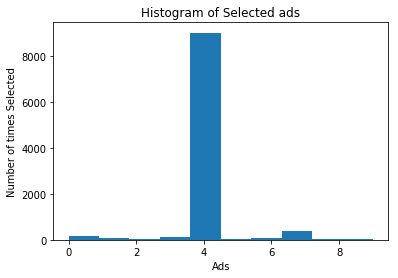

In [3]:
# visualizing Results
plt.hist(ads_selected)
plt.title('Histogram of Selected ads')
plt.xlabel('Ads')
plt.ylabel('Number of times Selected')
plt.show()